# Installing pystan 

In [1]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


# Installing Facebook Prophet

In [2]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


# Importing the data
### Wikipedia Albert Einstein Daily page views from 01 October 2015 to 31 October 2020

In [3]:
import requests
wiki_response = requests.get("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/Albert_Einstein/daily/20151001/20201031")
data_json=wiki_response.json()

### Dividing the October 2020 data to test

In [4]:
train= data_json["items"][:1858-31]
test = data_json["items"][1858-31:]


### Modifying the date format

In [5]:
data_list = []
for i in train:
    
    date = i["timestamp"][:8]
    formatted_date = date[:4] + "-" + date[4:6] +"-"+ date[6:]
    data_list.append([formatted_date,i["views"]])

data_list[:3]

[['2015-10-01', 18860], ['2015-10-02', 20816], ['2015-10-03', 16009]]

# Importing libraries
#### Transforming the list into Pandas DataFrame 
#### The dataframe columns names should be ds and y

In [6]:
import pandas as pd
from fbprophet import Prophet

train_data=pd.DataFrame(data_list)
train_data.columns=["ds",'y']

### Training the model

In [7]:
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


### Forecasting the October 2020 page views

In [8]:
future_31 = model.make_future_dataframe(periods=31)

In [9]:
forecast = model.predict(future_31)

In [10]:
prediction_31=forecast[len(forecast)-31:]

### Modifying date format of the test data

In [17]:
test_data_list = []
for i in test:
    test_data_list.append([i["timestamp"][6:8],i["views"]])

### Creating a list of forecasted data 

In [13]:
predicted_values=[]
for i in list(prediction_31["yhat"]):
    predicted_values.append(round(i))

### Comparing the actual data with forecasted data 

In [14]:
comparison_list=[]
for i,j in zip((range(len(test_data_list))) ,predicted_values):
    comparison_list.append([test_data_list[i][0],test_data_list[i][1],j])

In [15]:
comparison_data= pd.DataFrame(comparison_list)
comparison_data.columns=["date","Actual","Predicted"]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


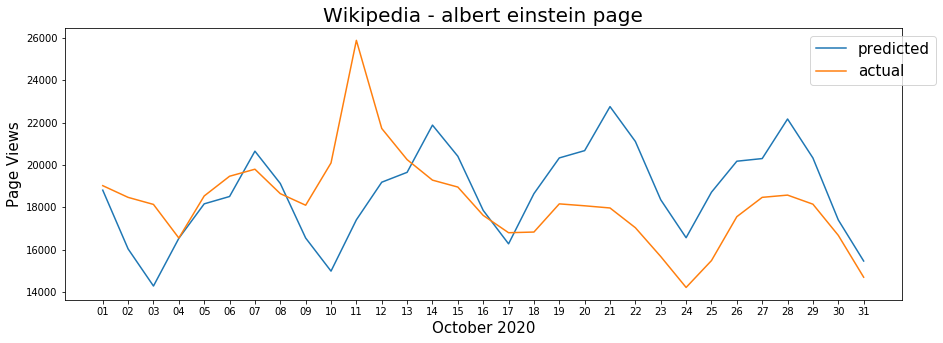

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title("Wikipedia - albert einstein page",fontsize=20)
plt.plot(comparison_data["date"],comparison_data["Predicted"],label="predicted")
plt.plot(comparison_data["date"],comparison_data["Actual"],label="actual")
plt.xlabel('October 2020', fontsize=15)
plt.ylabel('Page Views', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1),fontsize = 15)
plt.show()